In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd


plt.rc('font', family='sans-serif', serif='Helvetica')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=16)



In [2]:
data_path = '/home/tanmay/JHU/project/deep-mediation/final_code/results/simulation-1'

In [3]:
df_100_shallow = pd.read_excel(os.path.join(data_path,'simulation-1-num-subs-100-shallow.xlsx'))
df_500_shallow = pd.read_excel(os.path.join(data_path,'simulation-1-num-subs-500-shallow.xlsx'))
df_1000_shallow = pd.read_excel(os.path.join(data_path,'simulation-1-num-subs-1000-shallow.xlsx'))

df_100_deep = pd.read_excel(os.path.join(data_path,'simulation-1-num-subs-100-deep.xlsx'))
df_500_deep = pd.read_excel(os.path.join(data_path,'simulation-1-num-subs-500-deep.xlsx'))
df_1000_deep = pd.read_excel(os.path.join(data_path,'simulation-1-num-subs-1000-deep.xlsx'))

df_100_svr = pd.read_excel(os.path.join(data_path,'simulation-1-num-subs-100-svr.xlsx'))
df_500_svr = pd.read_excel(os.path.join(data_path,'simulation-1-num-subs-500-svr.xlsx'))
df_1000_svr = pd.read_excel(os.path.join(data_path,'simulation-1-num-subs-1000-svr.xlsx'))

In [4]:
def create_empty_df(num_runs,num_iters):
    # Creates an empty dataFrame
    a = np.empty((num_runs,num_iters))
    a[:] = np.nan
    dataFrame = None
    parameters = ['alpha0', 'beta0','alpha','beta','gamma']
    for params in parameters:
        iter = ['iter_'+str(i) for i in range(num_iters)]
        pdindex = pd.MultiIndex.from_product([[params], iter],
                                             names=['parameters', 'runs']) 
        frame = pd.DataFrame(a, columns = pdindex,index = range(0,num_runs))
        dataFrame = pd.concat([dataFrame,frame],axis=1)
    return dataFrame

def format_dataframe(input_df):
    
    df = create_empty_df(101,20)
    input_df.columns = ['col-'+str(i) for i in range(1,102)]
    start = 0
    end = 20
    k = 0
    params = ['alpha0', 'beta0','alpha','beta','gamma']
    for idx,j in enumerate(params):
        for i in range(start,end):
            k = 20*idx+i
            df[j,'iter_'+str(i)].loc[1:100] = input_df['col-'+str(k+2)]
    df = df.dropna()
    
    return df

In [5]:
df_100_shallow_format = format_dataframe(df_100_shallow)
df_500_shallow_format = format_dataframe(df_500_shallow)
df_1000_shallow_format = format_dataframe(df_1000_shallow)

df_100_deep_format = format_dataframe(df_100_deep)
df_500_deep_format = format_dataframe(df_500_deep)
df_1000_deep_format = format_dataframe(df_1000_deep)

df_100_svr_format = format_dataframe(df_100_svr)
df_500_svr_format = format_dataframe(df_500_svr)
df_1000_svr_format = format_dataframe(df_1000_svr)
# print(df_100.shape,df_500.shape,df_1000.shape)

/home/tanmay/anaconda3/envs/deep_structure/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
df = pd.DataFrame(columns=['alpha','beta','gamma','alpha*beta','Number of subjects','Algorithm'])
iteration_to_use = 'iter_18'
df['alpha'] = pd.concat([df_100_shallow_format['alpha'][iteration_to_use],
                         df_100_deep_format['alpha'][iteration_to_use],
                         df_100_svr_format['alpha'][iteration_to_use],
                         df_500_shallow_format['alpha'][iteration_to_use],
                         df_500_deep_format['alpha'][iteration_to_use],
                         df_500_svr_format['alpha'][iteration_to_use],
                         df_1000_shallow_format['alpha'][iteration_to_use],
                         df_1000_deep_format['alpha'][iteration_to_use],
                   df_1000_svr_format['alpha'][iteration_to_use]])
df['alpha'] = df['alpha'].astype('float')

df['beta'] = pd.concat([df_100_shallow_format['beta'][iteration_to_use],
                         df_100_deep_format['beta'][iteration_to_use],
                         df_100_svr_format['beta'][iteration_to_use],
                         df_500_shallow_format['beta'][iteration_to_use],
                         df_500_deep_format['beta'][iteration_to_use],
                         df_500_svr_format['beta'][iteration_to_use],
                         df_1000_shallow_format['beta'][iteration_to_use],
                         df_1000_deep_format['beta'][iteration_to_use],
                   df_1000_svr_format['beta'][iteration_to_use]])
df['beta'] = df['beta'].astype('float')

df['gamma'] = pd.concat([df_100_shallow_format['gamma'][iteration_to_use],
                         df_100_deep_format['gamma'][iteration_to_use],
                         df_100_svr_format['gamma'][iteration_to_use],
                         df_500_shallow_format['gamma'][iteration_to_use],
                         df_500_deep_format['gamma'][iteration_to_use],
                         df_500_svr_format['gamma'][iteration_to_use],
                         df_1000_shallow_format['gamma'][iteration_to_use],
                         df_1000_deep_format['gamma'][iteration_to_use],
                   df_1000_svr_format['gamma'][iteration_to_use]])
df['gamma'] = df['gamma'].astype('float')

df['Number of subjects'] = np.concatenate([[100]*300,[500]*300,[1000]*300])
df['Number of subjects'] = df['Number of subjects'].astype('category')

df['Algorithm'] = np.array([['Shallow-network']*100,['Deep-network']*100,['SVR']*100]*3).flatten()#np.concatenate([['Shallow-network']*100,['Deep-network']*100,['SVR']*100])
df['Algorithm'] = df['Algorithm'].astype('category')

df['alpha*beta'] = pd.concat([df_100_shallow_format['alpha',iteration_to_use]*df_100_shallow_format['beta',iteration_to_use],
                              df_100_deep_format['alpha',iteration_to_use]*df_100_deep_format['beta',iteration_to_use],
                              df_100_svr_format['alpha',iteration_to_use]*df_100_svr_format['beta',iteration_to_use],
                              df_500_shallow_format['alpha',iteration_to_use]*df_500_shallow_format['beta',iteration_to_use],
                              df_500_deep_format['alpha',iteration_to_use]*df_500_deep_format['beta',iteration_to_use],
                              df_500_svr_format['alpha',iteration_to_use]*df_500_svr_format['beta',iteration_to_use],
                              df_1000_shallow_format['alpha',iteration_to_use]*df_1000_shallow_format['beta',iteration_to_use],
                              df_1000_deep_format['alpha',iteration_to_use]*df_1000_deep_format['beta',iteration_to_use],
                              df_1000_svr_format['alpha',iteration_to_use]*df_1000_svr_format['beta',iteration_to_use]])
df['alpha*beta'] = df['alpha*beta'].astype('float')

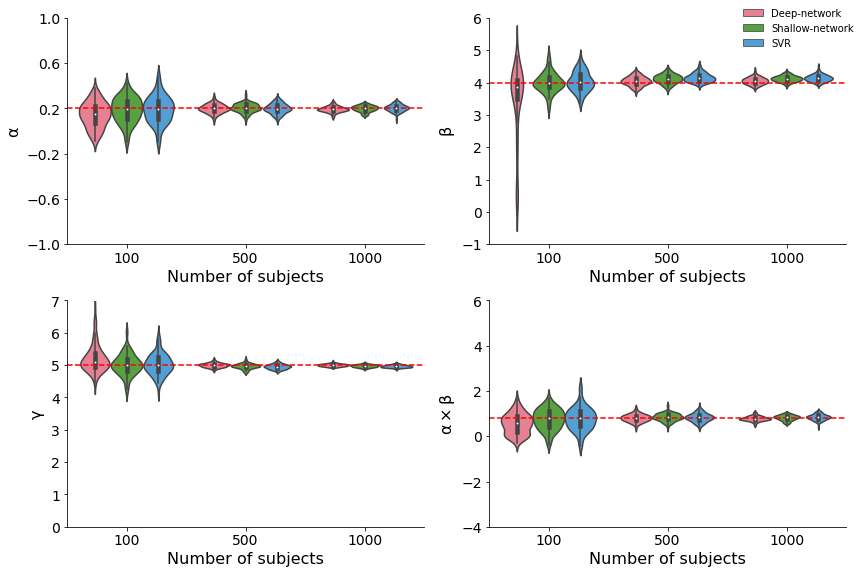

In [9]:
# import matplotlib.ticker as ticker
fig = plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
ax1 = sns.violinplot(x="Number of subjects", y="alpha", hue="Algorithm",data=df, palette="husl",
                    hue_order=[ "Deep-network", "Shallow-network", "SVR"])
ax1.set_ylabel(r'$\mathrm{\alpha}$')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.grid(False)
ax1.set_ylim([-1,1])
ax1.set_yticks([-1,-0.6,-0.2,0.2,0.6,1])
ax1.axhline(0.20, ls='--',c='red')
ax1.legend_.remove()

#####################################################################################################

plt.subplot(2, 2, 2)
ax2 = sns.violinplot(x="Number of subjects",y="beta",hue='Algorithm',data=df, palette="husl",
                    hue_order=[ "Deep-network", "Shallow-network", "SVR"])
ax2.set_ylabel(r'$\mathrm{\beta}$')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.grid(False)
ax2.set_ylim([-1,6])
ax2.axhline(4, ls='--',c='red')
ax2.legend_.remove()

#####################################################################################################

plt.subplot(2, 2, 3)
ax3 = sns.violinplot(x="Number of subjects",y="gamma",hue='Algorithm',data=df, palette="husl",
                    hue_order=[ "Deep-network", "Shallow-network", "SVR"])
ax3.set_ylabel(r'$\mathrm{\gamma}$')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_color('black')
ax3.spines['left'].set_color('black')
ax3.grid(False)
ax3.set_ylim([0,7])
ax3.axhline(5, ls='--',c='red')
ax3.legend_.remove()

#####################################################################################################

plt.subplot(2, 2, 4)
ax4 = sns.violinplot(x="Number of subjects",y="alpha*beta",hue='Algorithm',data=df, palette="husl",
                    hue_order=[ "Deep-network", "Shallow-network", "SVR"])
ax4.set_ylabel(r'$\mathrm{\alpha \times \beta}$')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_color('black')
ax4.spines['left'].set_color('black')
ax4.grid(False)
ax4.set_ylim([-4,6])
ax4.axhline(0.80, ls='--',c='red')
ax4.legend_.remove()

handles, labels = ax1.get_legend_handles_labels()
# fig.legend(handles, labels, loc = (0.9, 0.9),frameon=False)
fig.legend(handles, labels, loc = 'upper right',frameon=False)
# ax.legend(handles, labels, loc='upper right',numpoints=1,frameon=False,labelspacing=1)
plt.tight_layout()
plt.savefig(os.path.join(data_path,'parameters-simulation-1-model-comparison-violin-plot.png'),dpi=600,
           bbox_inches='tight')
plt.show()

In [14]:
def create_convergence_plot(df,variables=['alpha0','beta0','alpha','beta','gamma'],title="Convergence"):
    
    fig, axs = plt.subplots(3, 2,figsize=(20,20))
    axs[2,1].remove()
    
    for ax in fig.axes:
        plt.sca(ax)
        plt.xticks(rotation=90)
    
    for i in range(0,100):
        axs[0, 0].plot(df[variables[0]].iloc[i])
        axs[0, 1].plot(df[variables[1]].iloc[i])
        axs[1, 0].plot(df[variables[2]].iloc[i])
        axs[1, 1].plot(df[variables[3]].iloc[i])
        axs[2, 0].plot(df[variables[4]].iloc[i])
    
    axs[0, 0].set_title(str("Convergence for plot for " + variables[0]))
    axs[0, 1].set_title(str("Convergence for plot for " + variables[1]))
    axs[1, 0].set_title(str("Convergence for plot for " + variables[2]))
    axs[1, 1].set_title(str("Convergence for plot for " + variables[3]))
    axs[2, 0].set_title(str("Convergence for plot for " + variables[4]))

    plt.suptitle(title)
    fig.tight_layout() 
    fig.subplots_adjust(top=0.95)
    plt.savefig(os.path.join(data_path,title+'.png'),dpi=300,bbox_inches='tight')

    plt.show()
    
    

In [42]:
df_1000_shallow_format

parameters       alpha0                                                  \
runs             iter_0      iter_1      iter_2      iter_3      iter_4   
1           0.000725206  0.00554487  0.00632228  0.00669944  0.00688821   
2           -0.00206695  -0.0120788  -0.0141997  -0.0147757  -0.0151654   
3           -0.00125104 -0.00475637 -0.00587074 -0.00626796 -0.00629495   
4           0.000603649  0.00166676  0.00197371  0.00218031   0.0022511   
5            -0.0014363  -0.0114656  -0.0120619  -0.0123784  -0.0125202   
..                  ...         ...         ...         ...         ...   
96         -2.42844e-05  0.00257078  0.00325425  0.00343106  0.00349632   
97           0.00107475  0.00565169  0.00755445  0.00792471  0.00795074   
98          0.000256033  0.00393782  0.00428829   0.0043752  0.00440527   
99         -0.000288135 -0.00347705 -0.00453521 -0.00473686 -0.00475474   
100        -0.000590574  0.00337735  0.00402005   0.0041523  0.00417523   

parameters                                                              ...  \
runs            iter_5      iter_6      iter_7      iter_8      iter_9  ...   
1           0.00693631   0.0069213  0.00687928  0.00690169  0.00689227  ...   
2           -0.0151965  -0.0153465  -0.0153836  -0.0153696  -0.0151915  ...   
3           -0.0064718 -0.00668113 -0.00665007 -0.00668642 -0.00657962  ...   
4            0.0022952  0.00231011  0.00230407  0.00231562  0.00231733  ...   
5           -0.0126027  -0.0125681   -0.012562  -0.0126167  -0.0125455  ...   
..                 ...         ...         ...         ...         ...  ...   
96          0.00355222  0.00352614  0.00364827  0.00366129  0.00366561  ...   
97          0.00807929  0.00806618  0.00806835  0.00802093   0.0080557  ...   
98          0.00434316   0.0044019    0.004413  0.00443347  0.00441298  ...   
99         -0.00475563 -0.00459912 -0.00476207 -0.00476178 -0.00471662  ...   
100         0.00410535  0.00412377  0.00411086  0.00414857  0.00415191  ...   

parameters    gamma                                                        \
runs        iter_10  iter_11  iter_12  iter_13  iter_14  iter_15  iter_16   
1           4.96168  4.95721  4.96473  4.95587  4.96343  4.96321  4.96836   
2           4.96242  4.95811  4.94536  4.94951  4.96018  4.96563  4.95506   
3           5.03861  5.05104  5.05301  5.04182   5.0569  5.07228  5.05055   
4           4.98621  4.98004  4.99541  5.00093  4.99942  4.98409  4.98747   
5           4.93614  4.93918  4.92233  4.92732  4.93566  4.94205  4.92724   
..              ...      ...      ...      ...      ...      ...      ...   
96          4.96284  4.98219  4.98505  4.99273  4.97838  4.99259  4.97989   
97          5.01698  5.00818  5.01782  5.01122  5.01453  5.00494  5.02015   
98          4.99658  4.99616   5.0054  4.99929  5.00274   5.0049  5.00795   
99           5.0099  5.01312  5.01405  5.01517  5.00515  5.00635  5.00178   
100         5.02362   5.0138  4.98885  5.00364  4.99137  4.99981   5.0048   

parameters                             
runs        iter_17  iter_18  iter_19  
1           4.94058    4.938  4.98062  
2            4.9586  4.94876  4.94904  
3           5.04534  5.04251  5.03622  
4            4.9797  4.98447  4.99103  
5           4.96673  4.92599  4.92308  
..              ...      ...      ...  
96          4.98624  4.98421  4.99921  
97          5.00487  5.01515  5.00724  
98          4.99953   5.0068  5.00145  
99          5.00595   5.0178  5.00645  
100         4.98782  4.99413  4.99428  

[100 rows x 100 columns]

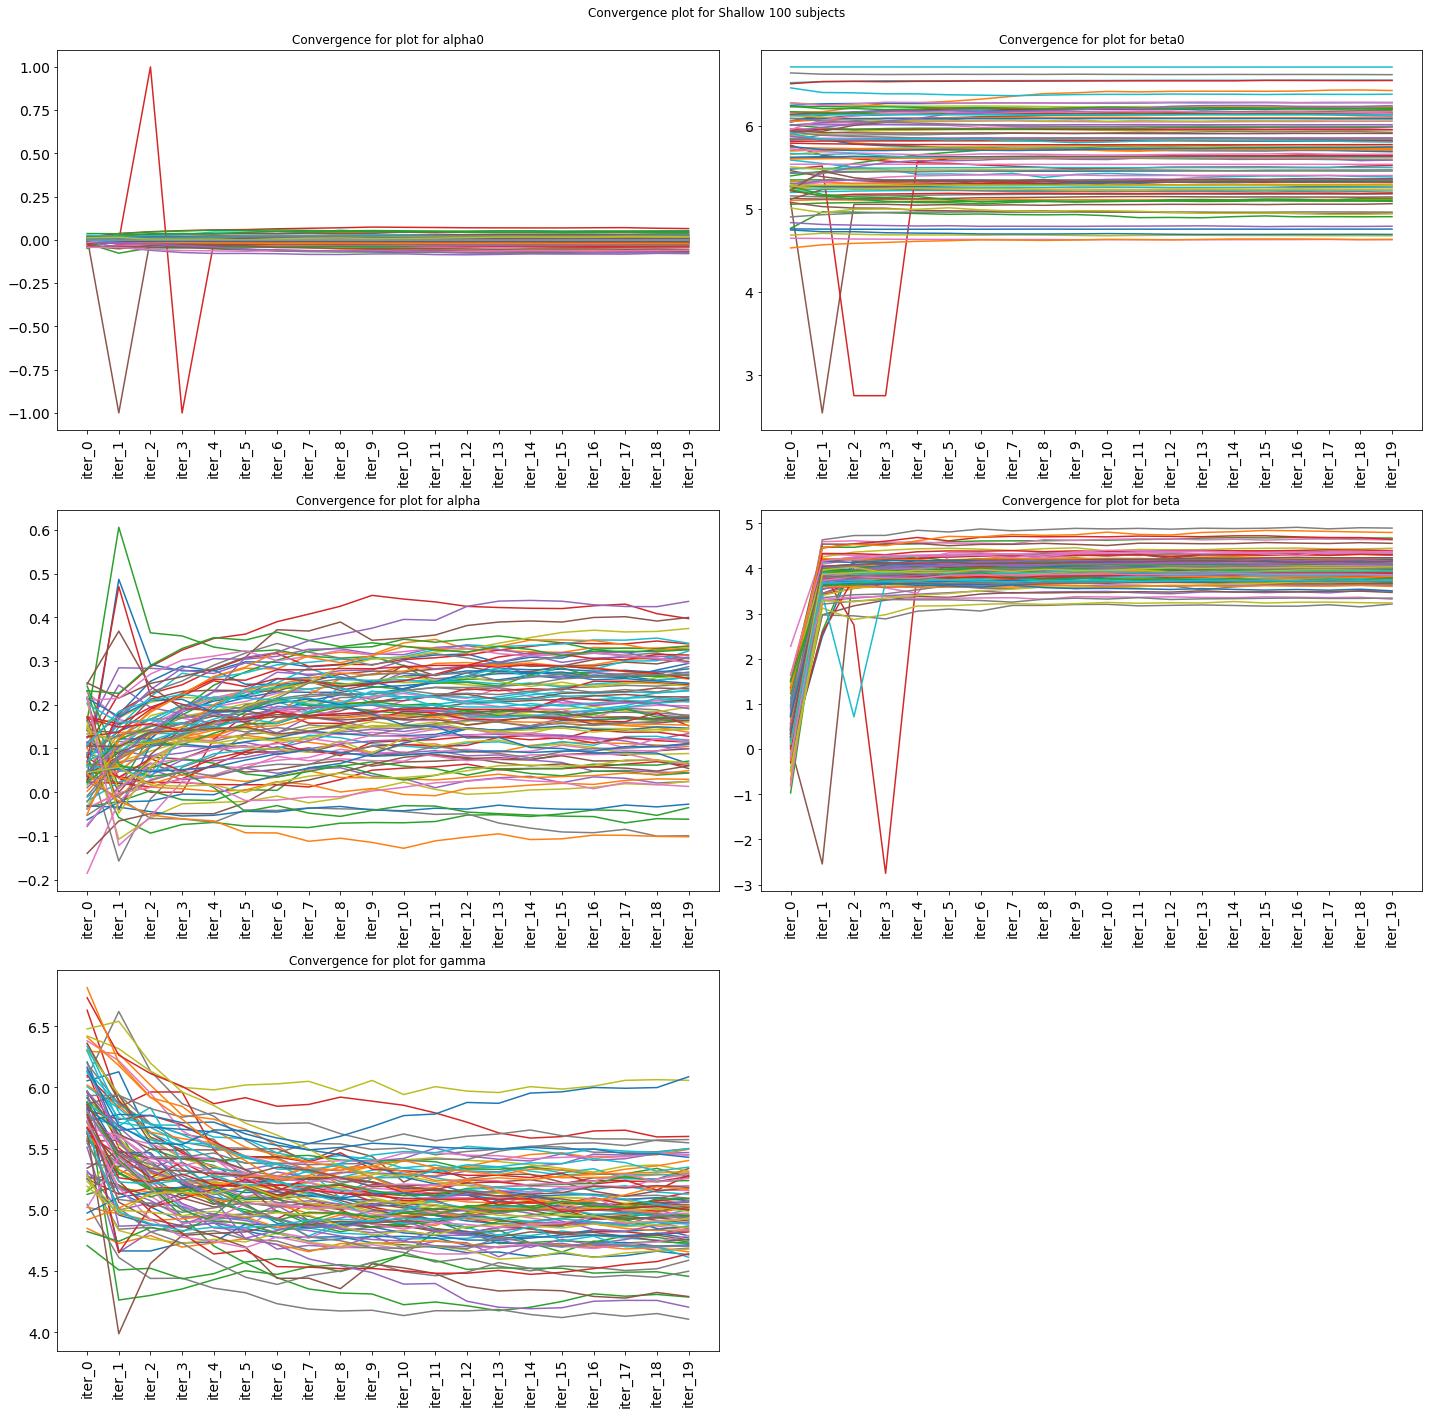

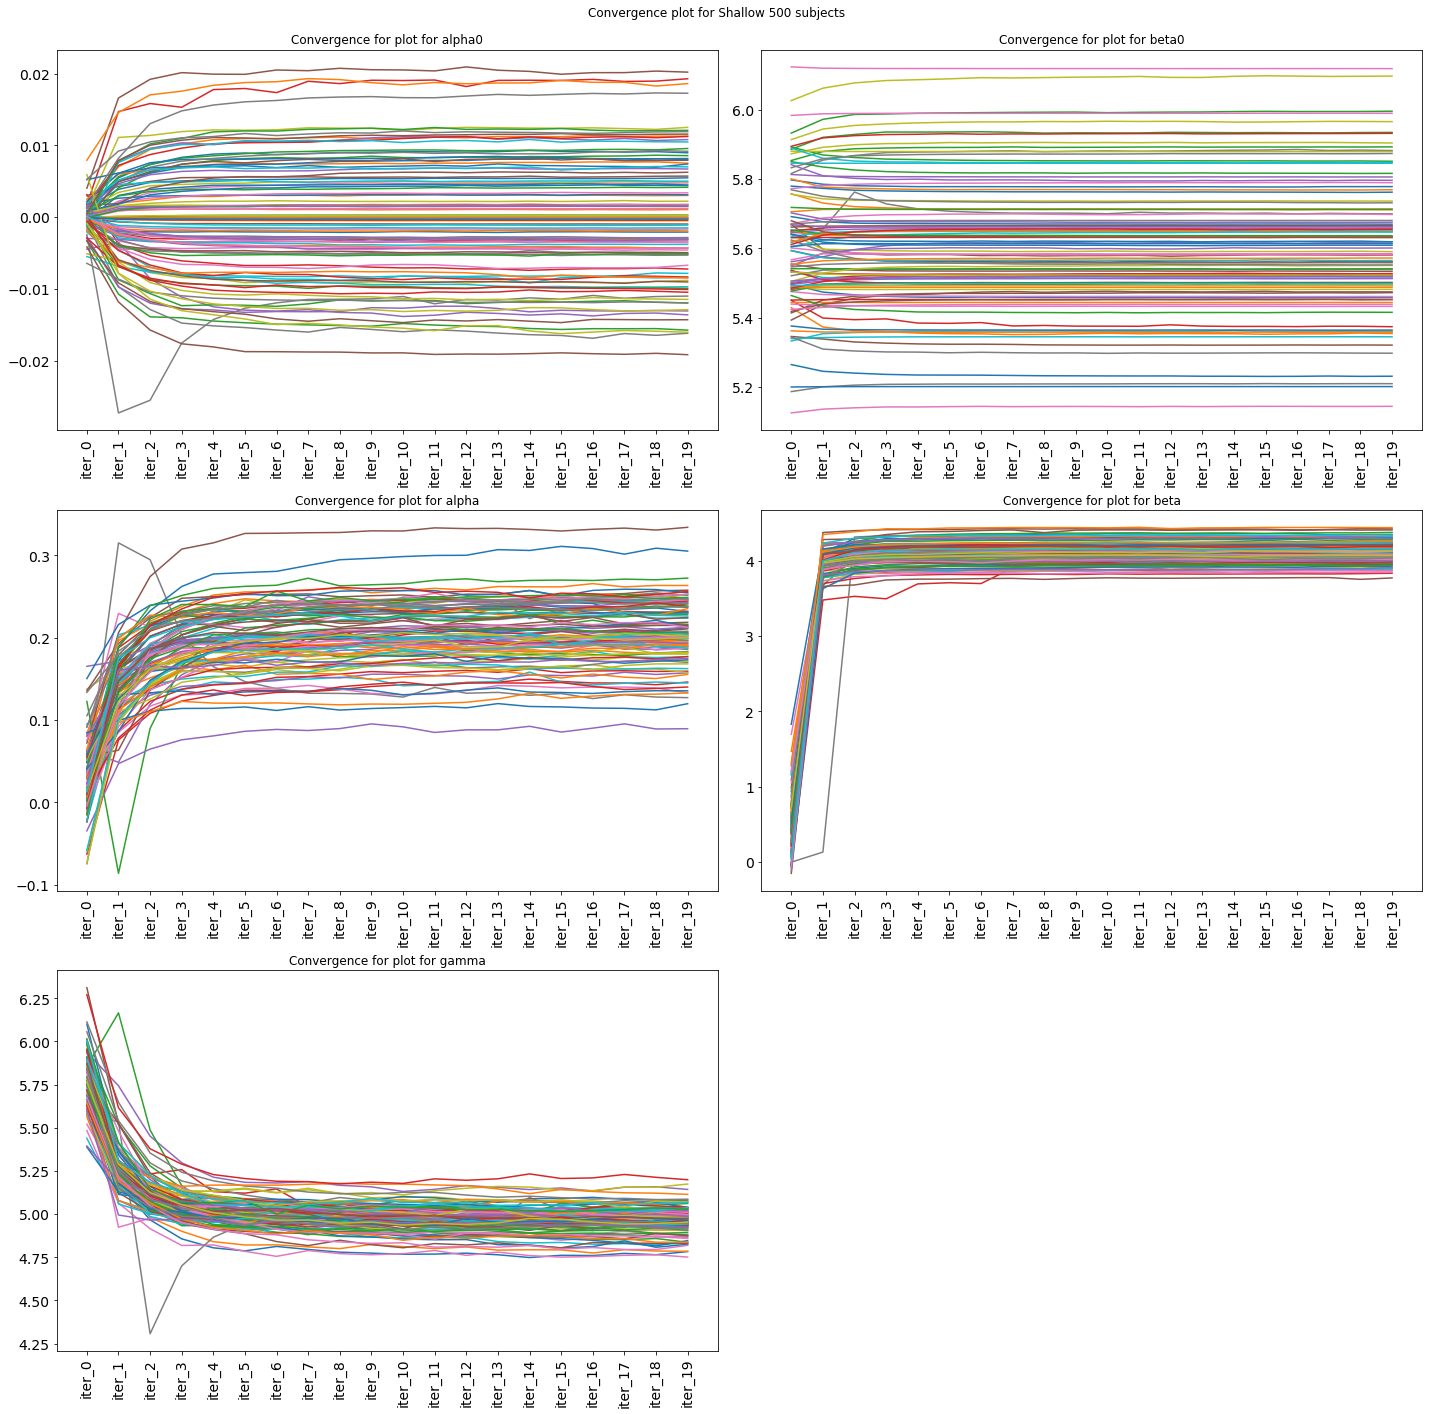

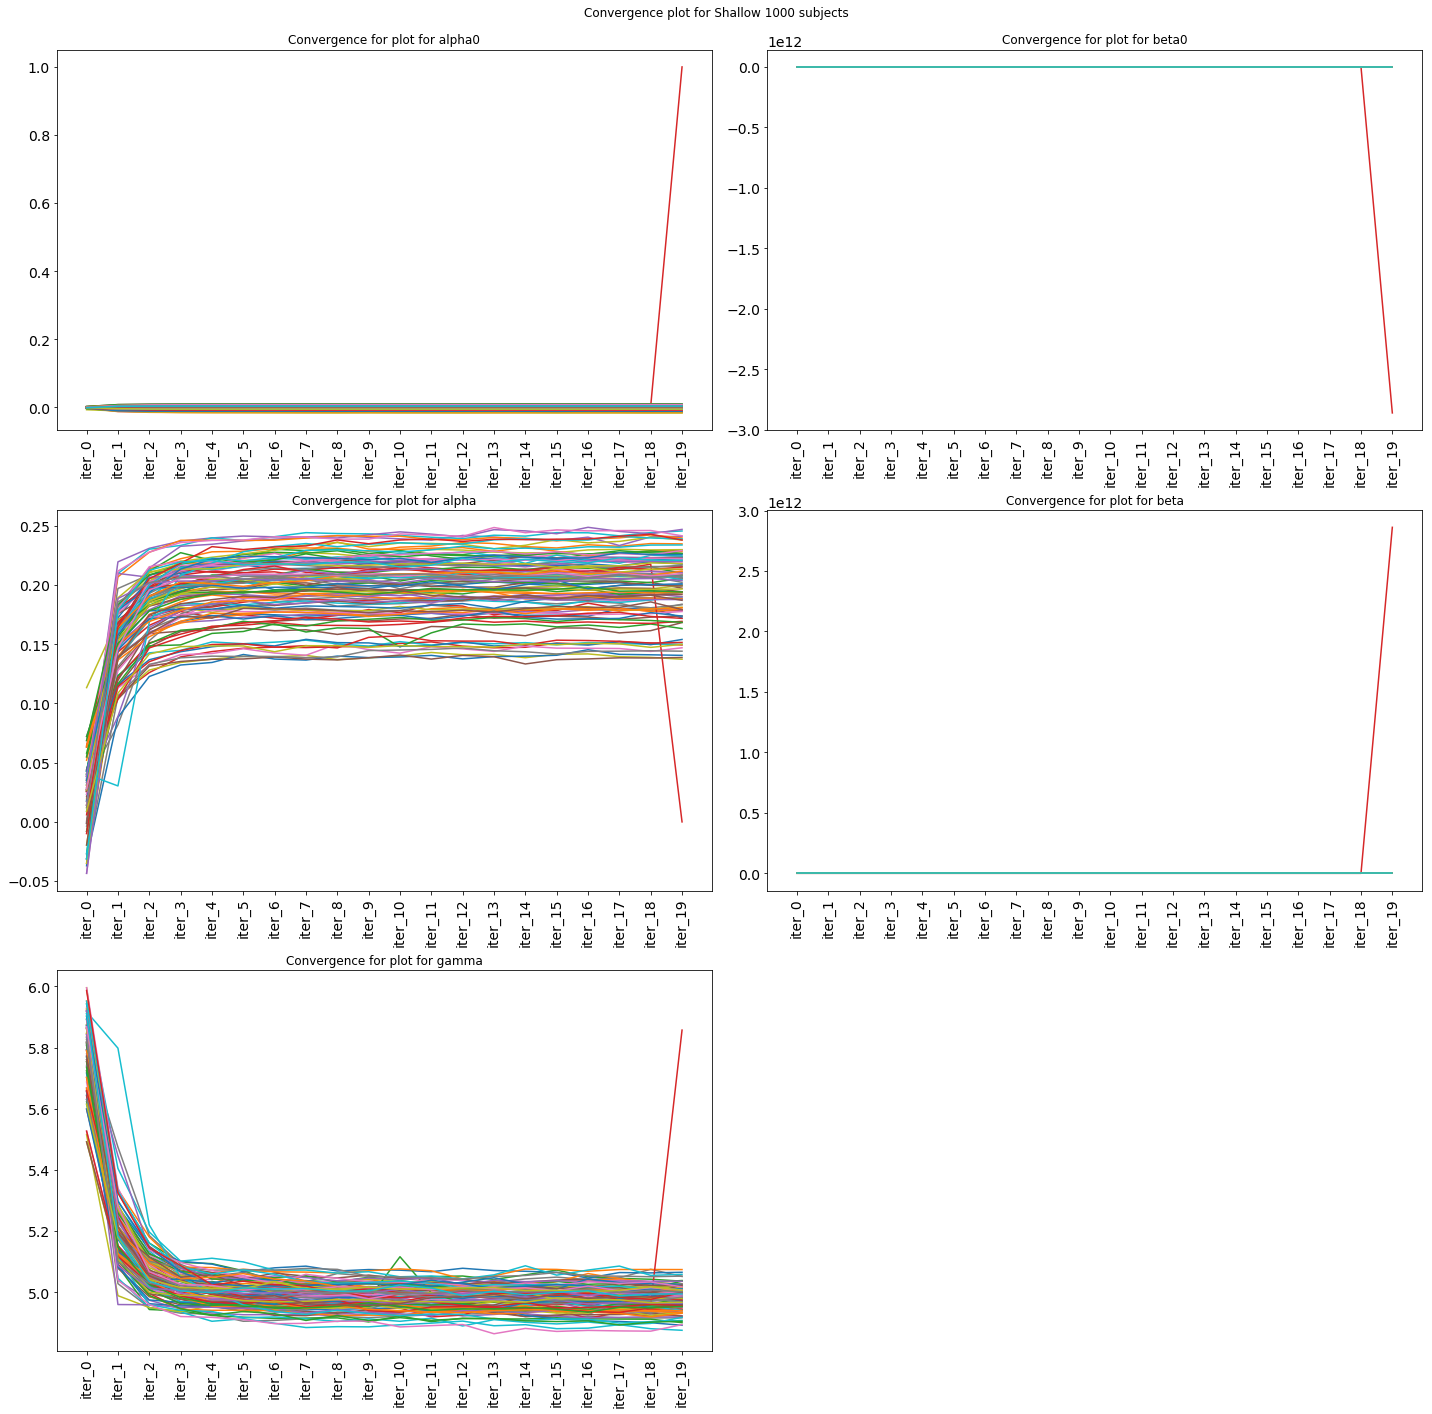

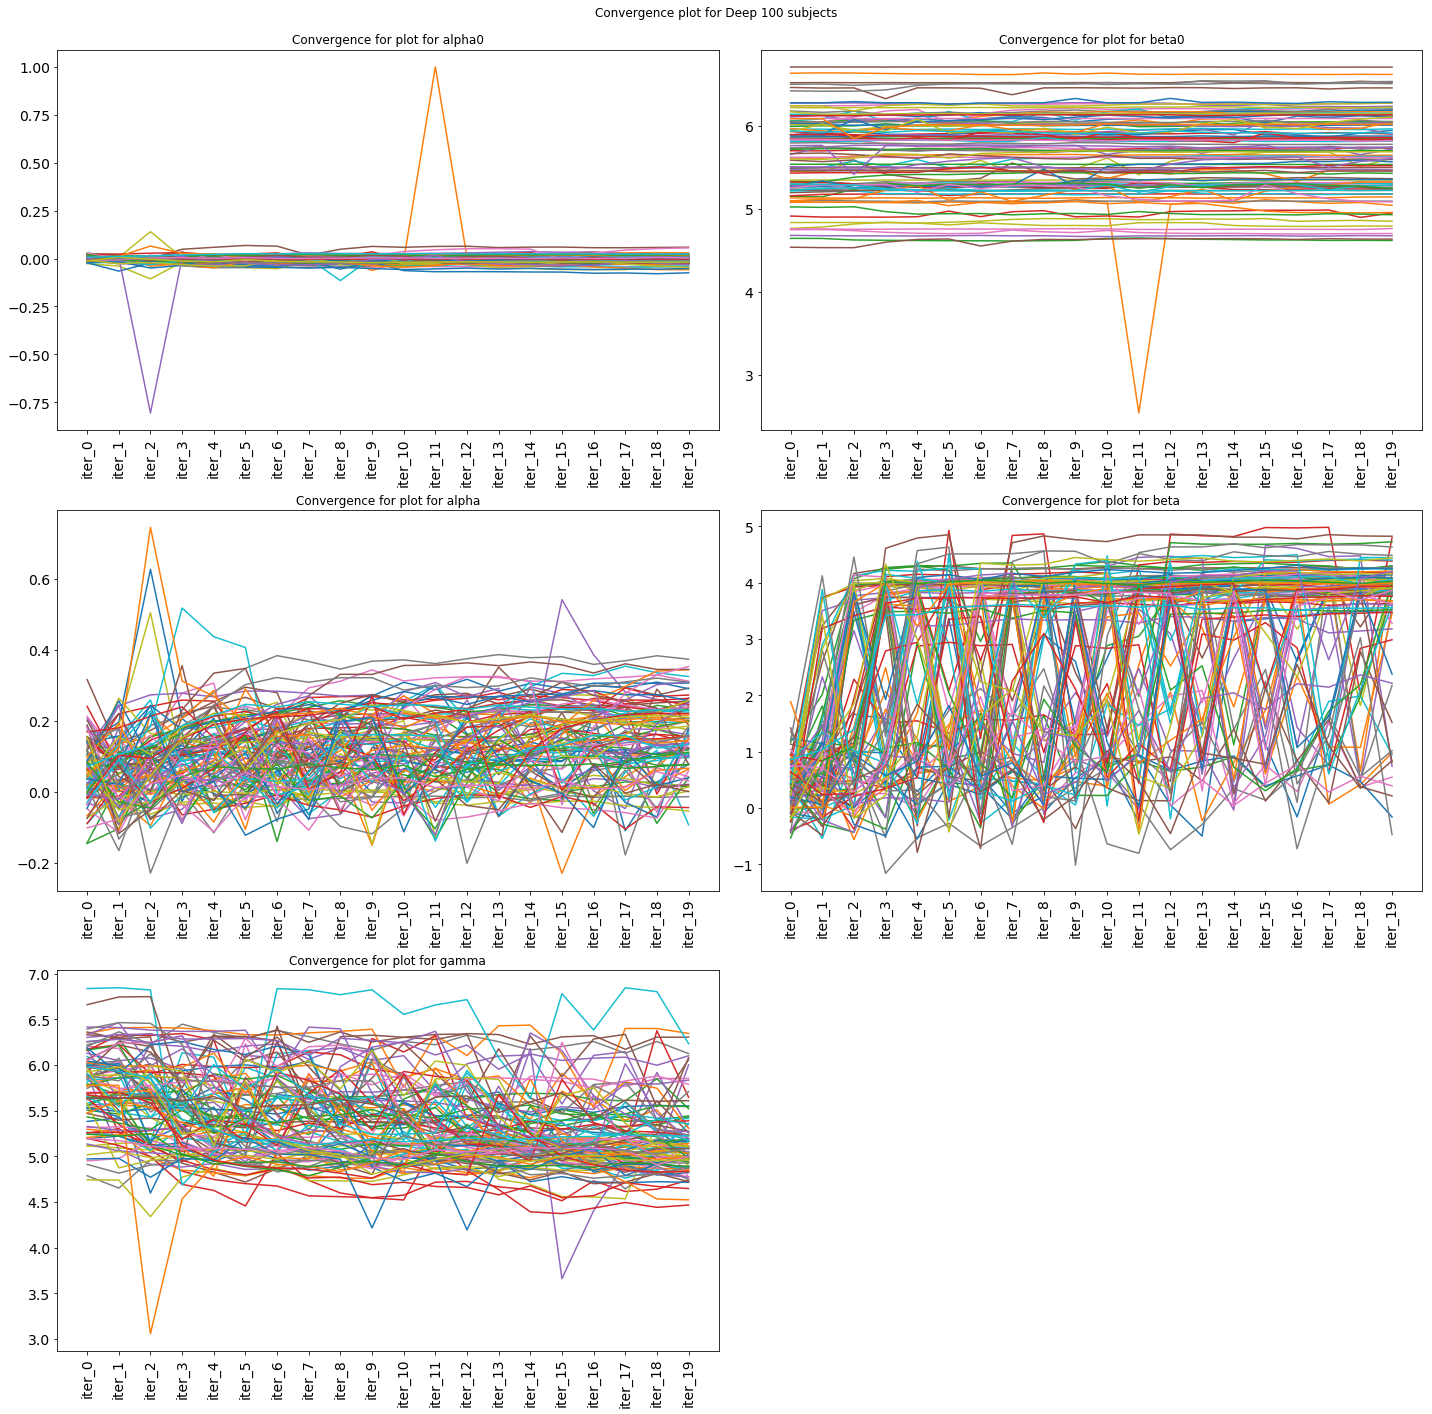

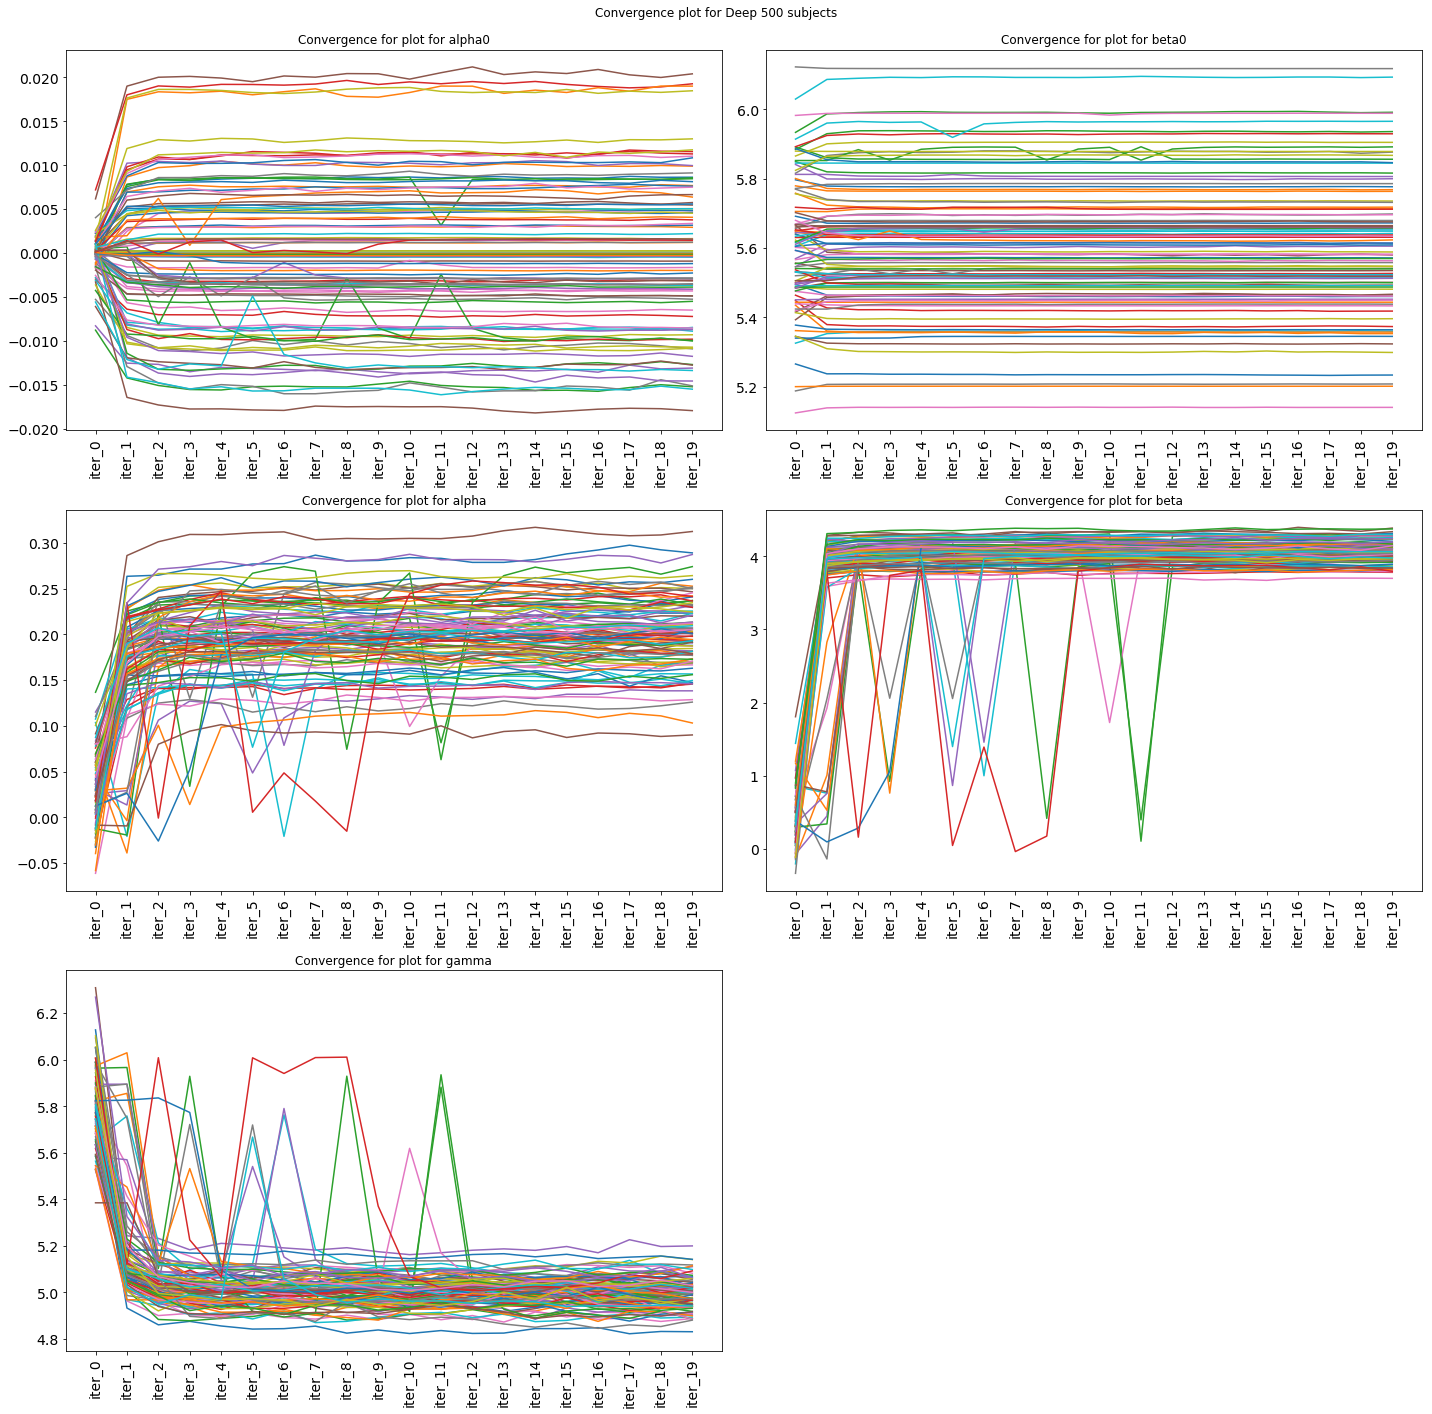

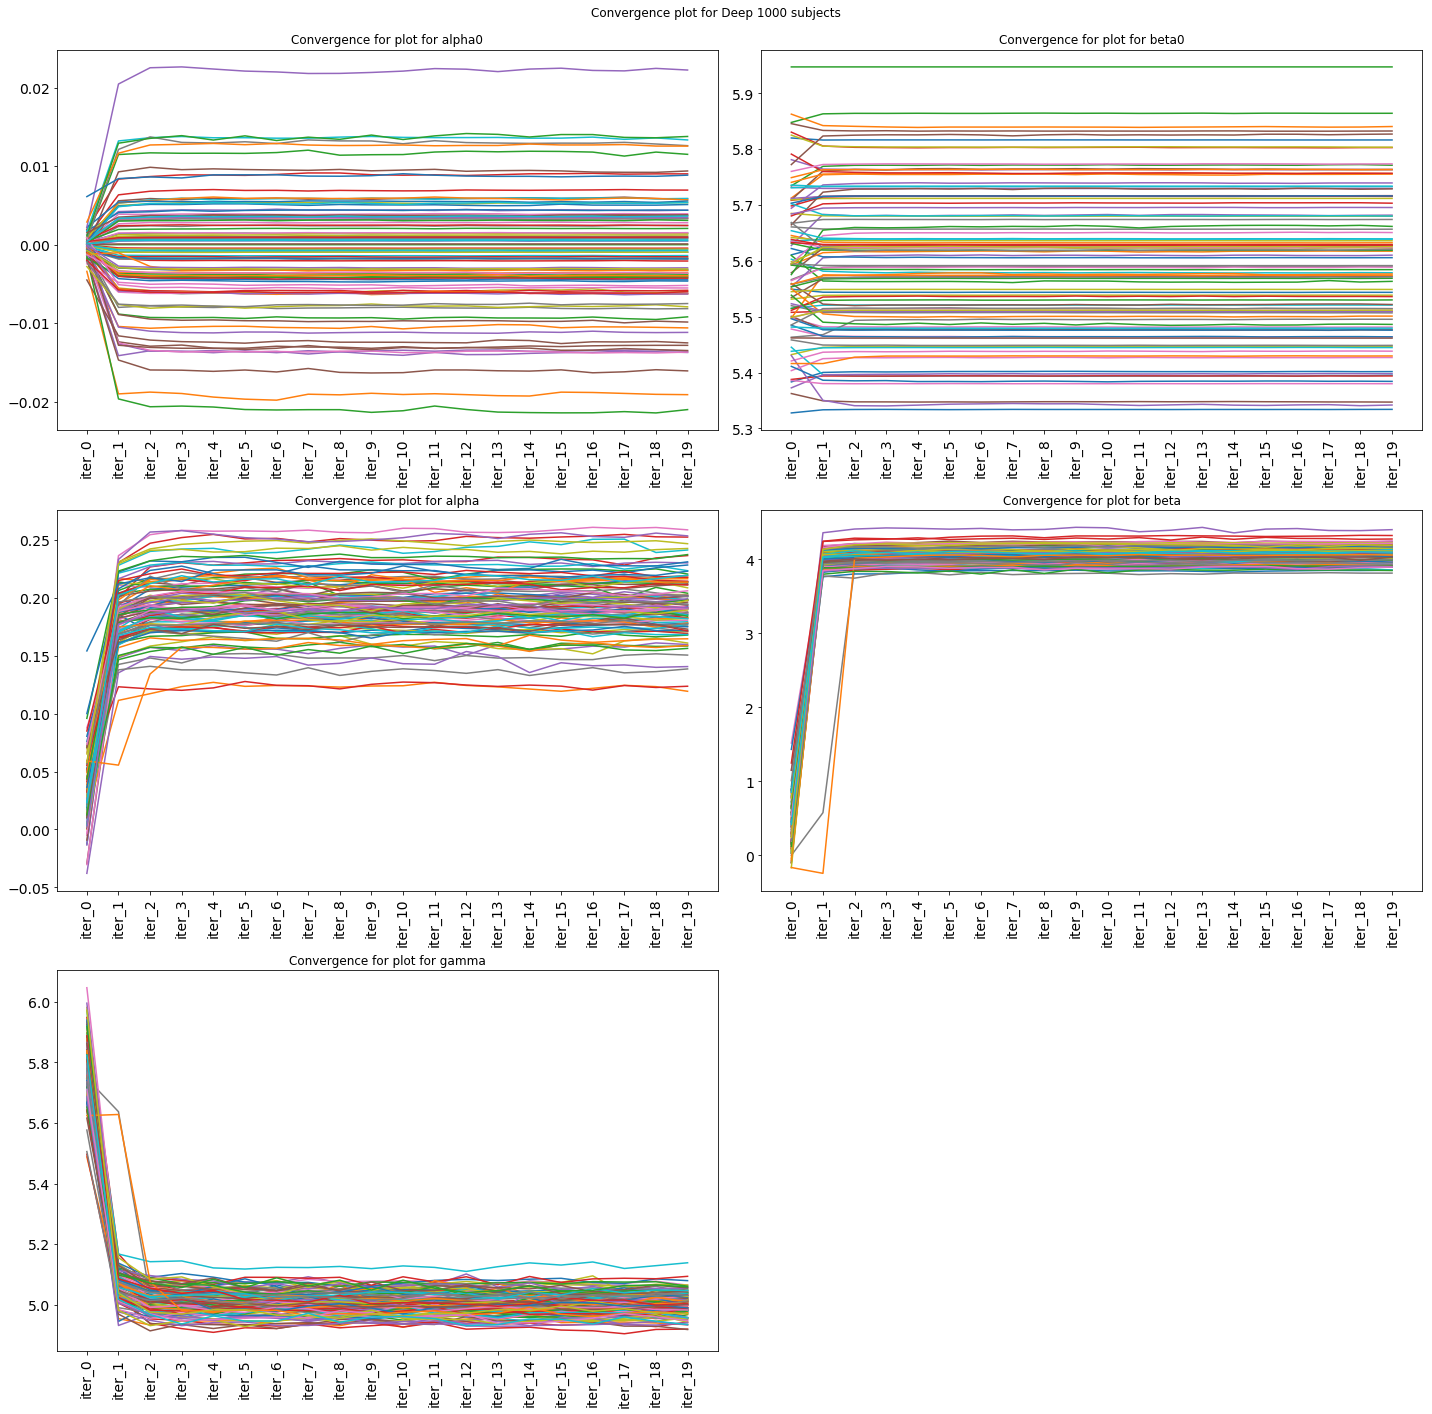

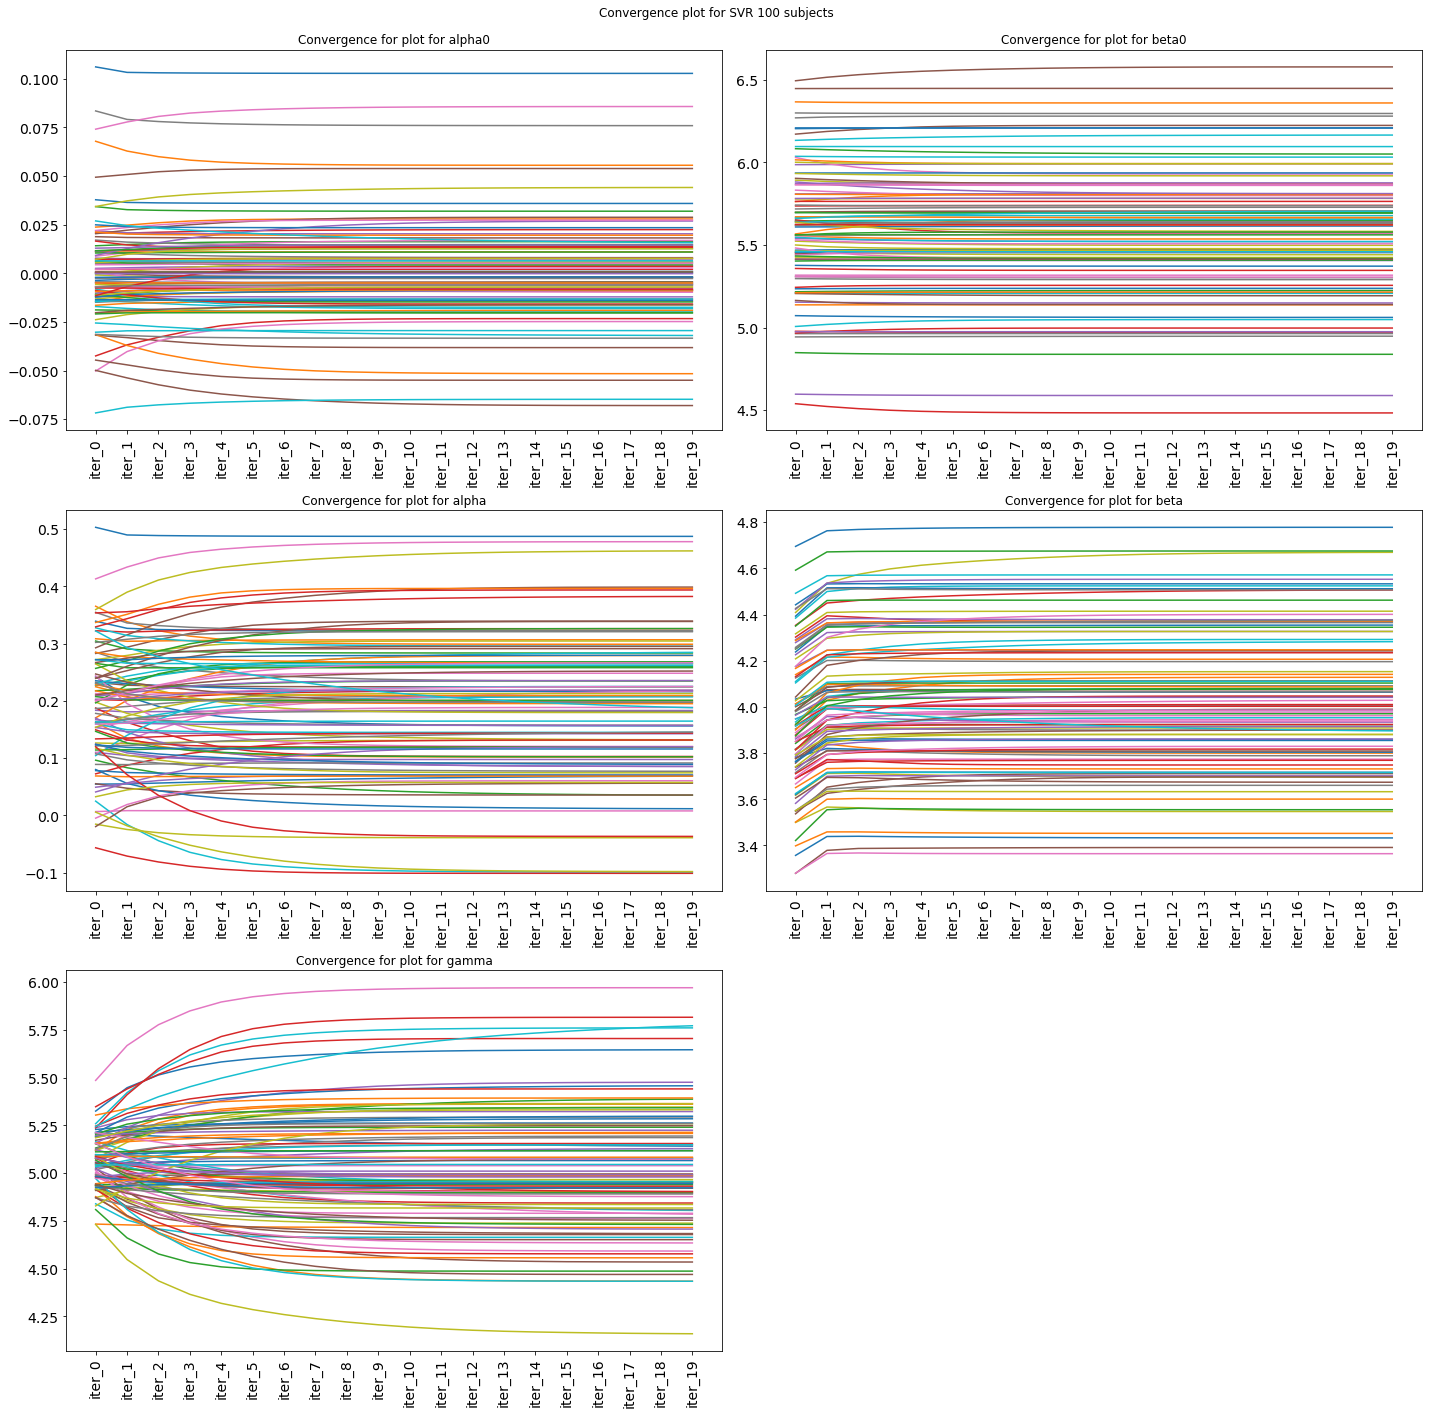

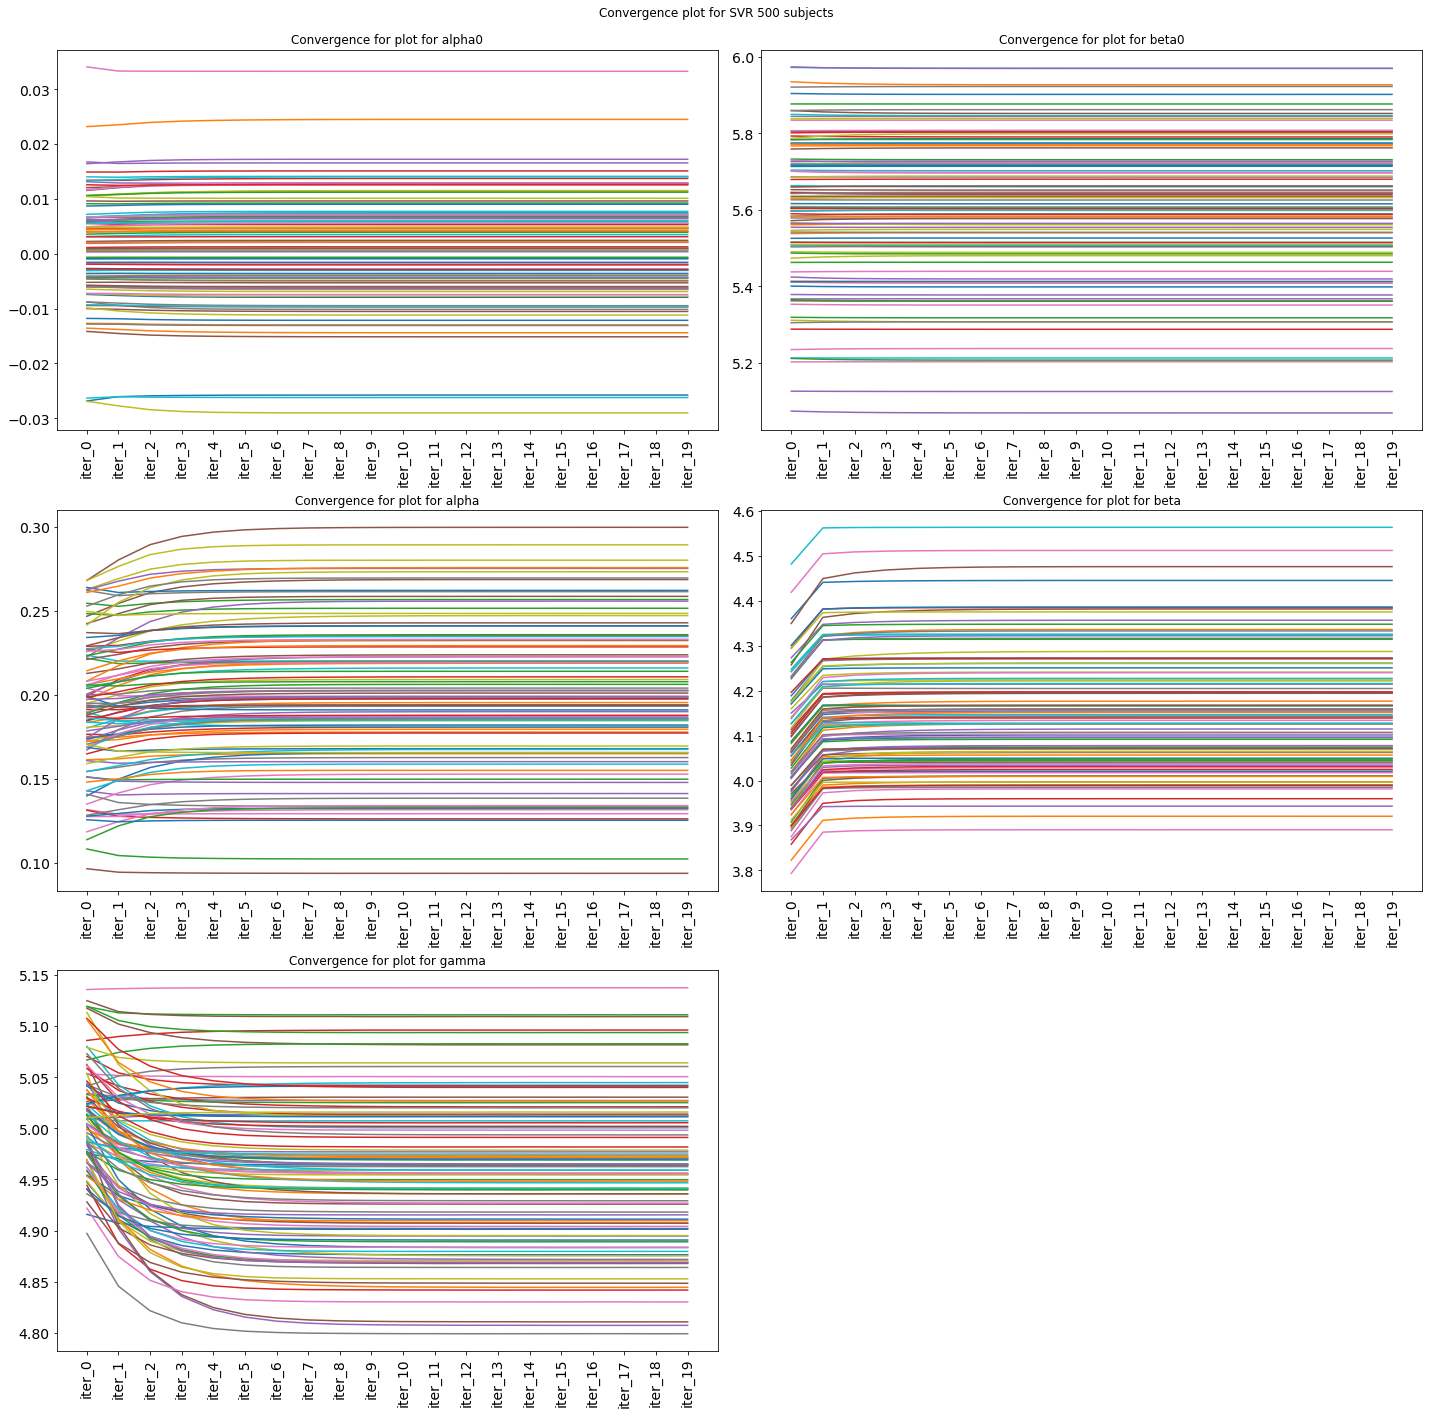

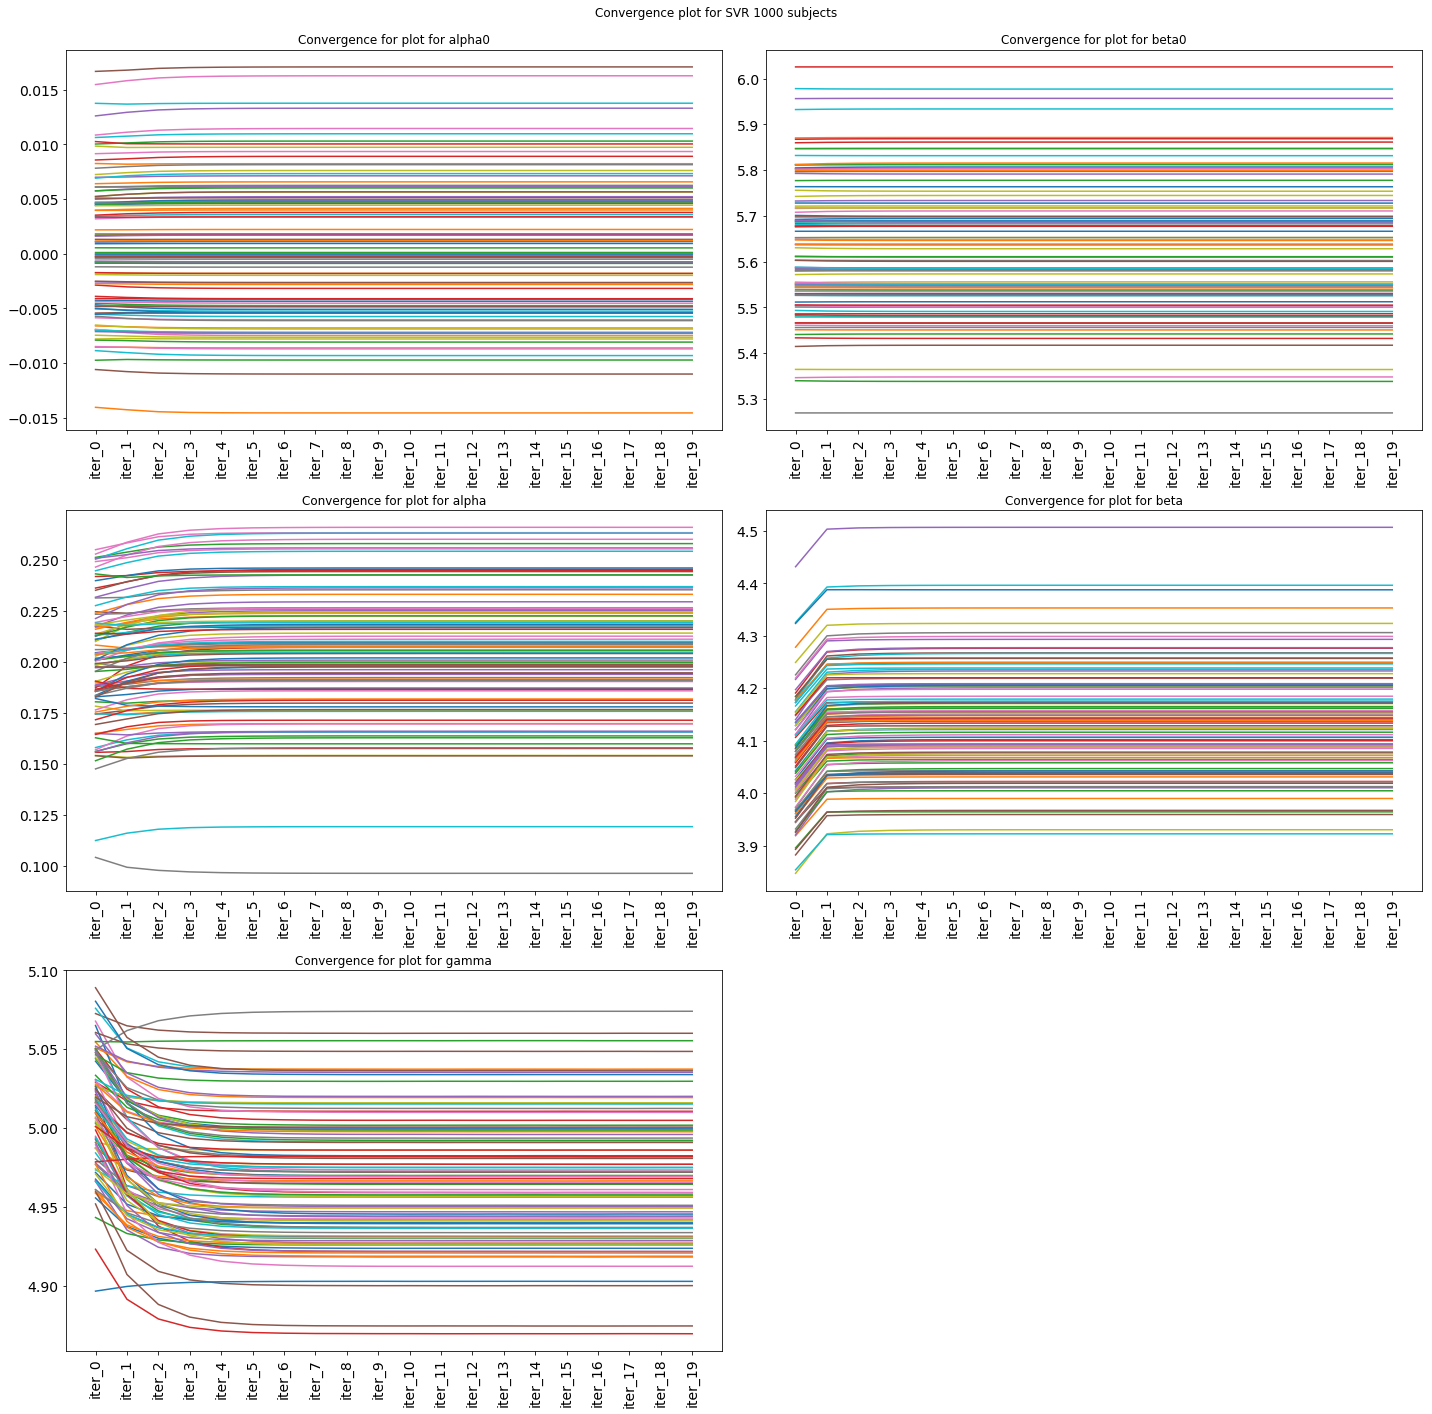

In [41]:
create_convergence_plot(df_100_shallow_format,title="Convergence plot for Shallow 100 subjects")
create_convergence_plot(df_500_shallow_format,title="Convergence plot for Shallow 500 subjects")
create_convergence_plot(df_1000_shallow_format,title="Convergence plot for Shallow 1000 subjects")

create_convergence_plot(df_100_deep_format,title="Convergence plot for Deep 100 subjects")
create_convergence_plot(df_500_deep_format,title="Convergence plot for Deep 500 subjects")
create_convergence_plot(df_1000_deep_format,title="Convergence plot for Deep 1000 subjects")

create_convergence_plot(df_100_svr_format,title="Convergence plot for SVR 100 subjects")
create_convergence_plot(df_500_svr_format,title="Convergence plot for SVR 500 subjects")
create_convergence_plot(df_1000_svr_format,title="Convergence plot for SVR 1000 subjects")
